In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df= pd.read_csv("C:/Users/Nalini P/Downloads/Data Science ExcelR/Decision Trees/Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

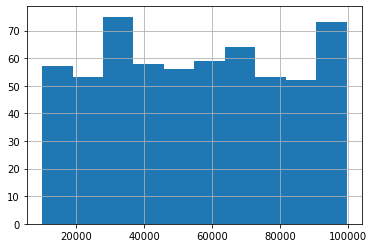

In [8]:
df["Taxable.Income"].hist()

In [10]:
X= df.drop("Taxable.Income", axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [12]:
x= pd.get_dummies(X)
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [13]:
y= pd.cut(df["Taxable.Income"], bins=[0, 30000 , 100000] , labels=["Risky", "Good"])

In [14]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [15]:
print(y.isna().sum())
print(y.isnull().sum())

0
0


In [16]:
y.value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [17]:
# It can be seen that this imbalanced data set, lets see whta happens if ths is used as it is

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Using GINI with max depth 3

In [19]:
dtc_gini = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth= 4)
dtc_gini.fit(x_train, y_train)
ypred_gini = dtc_gini.predict(x_test)

In [20]:
print(accuracy_score(y_test, ypred_gini))

0.7944444444444444


In [21]:
confusion_matrix(y_test, ypred_gini)

array([[143,   0],
       [ 37,   0]], dtype=int64)

In [22]:
# From above confusion matrix it can be seen that it is not able to identify the Risky or fraud

# Using SMOTE - Synthetic Minority Over-sampling Technique to balance the data

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
resample = SMOTE()
x_resampled, y_resampled = resample.fit_resample(x,y)

In [25]:
y_resampled.value_counts()

Risky    476
Good     476
Name: Taxable.Income, dtype: int64

In [26]:
y_resampled.shape

(952,)

In [27]:
x_resampled.shape

(952, 9)

# Using GINI with max depth 3 on Resampled data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [29]:
dtc_gini = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth= 7)
dtc_gini.fit(x_train, y_train)
ypred_gini = dtc_gini.predict(x_test)

In [30]:
print(accuracy_score(y_test, ypred_gini))

0.8111888111888111


In [31]:
confusion_matrix(y_test, ypred_gini)

array([[135,  11],
       [ 43,  97]], dtype=int64)

In [32]:
print(classification_report(y_test, ypred_gini))

              precision    recall  f1-score   support

        Good       0.76      0.92      0.83       146
       Risky       0.90      0.69      0.78       140

    accuracy                           0.81       286
   macro avg       0.83      0.81      0.81       286
weighted avg       0.83      0.81      0.81       286



# Using Tree with cost Complexity Pruning Technique for optimized score


In [36]:
dtc = DecisionTreeClassifier(random_state= 42)
dtc.fit(x_train, y_train)
ypred = dtc.predict(x_test)

In [37]:
prun_path = dtc.cost_complexity_pruning_path(x_train, y_train)
prun_path
ccp_alphas, impurities = prun_path.ccp_alphas , prun_path.impurities

In [40]:
dtcs= []
for ccp in ccp_alphas:
    dtc1 = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    dtc1.fit(x_train, y_train)
    dtcs.append(dtc1)

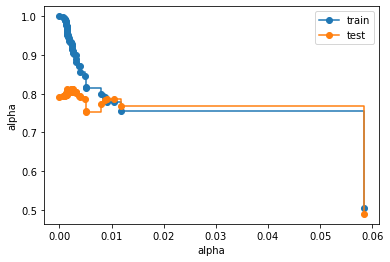

In [41]:
train_score = [dtcc.score(x_train, y_train) for dtcc in dtcs]
test_score = [dtcc.score(x_test, y_test) for dtcc in dtcs]

fig, ax= plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("alpha")
ax.plot(ccp_alphas, train_score, label= "train", drawstyle= "steps-post", marker= "o")
ax.plot(ccp_alphas, test_score, label= "test", drawstyle= "steps-post", marker= "o")
ax.legend()
plt.show()

In [42]:
dtc_op= DecisionTreeClassifier(random_state=42, ccp_alpha= 0.01)
dtc_op.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [44]:
y_pred = dtc_op.predict(x_test)

In [46]:
accuracy_score(y_test, y_pred)

0.7867132867132867

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.71      1.00      0.83       146
       Risky       1.00      0.56      0.72       140

    accuracy                           0.79       286
   macro avg       0.85      0.78      0.77       286
weighted avg       0.85      0.79      0.78       286



In [48]:
confusion_matrix(y_test, y_pred)

array([[146,   0],
       [ 61,  79]], dtype=int64)

[Text(0.5555555555555556, 0.9, 'X[6] <= 0.5\ngini = 0.5\nsamples = 666\nvalue = [330, 336]'),
 Text(0.3333333333333333, 0.7, 'X[4] <= 0.5\ngini = 0.487\nsamples = 480\nvalue = [202, 278]'),
 Text(0.2222222222222222, 0.5, 'X[5] <= 0.5\ngini = 0.423\nsamples = 343\nvalue = [104, 239]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 173\nvalue = [0, 173]'),
 Text(0.3333333333333333, 0.3, 'X[0] <= 76244.5\ngini = 0.475\nsamples = 170\nvalue = [104, 66]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.286\nsamples = 52\nvalue = [43, 9]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.499\nsamples = 118\nvalue = [61, 57]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.407\nsamples = 137\nvalue = [98, 39]'),
 Text(0.7777777777777778, 0.7, 'X[8] <= 0.5\ngini = 0.429\nsamples = 186\nvalue = [128, 58]'),
 Text(0.6666666666666666, 0.5, 'X[7] <= 0.5\ngini = 0.48\nsamples = 95\nvalue = [57, 38]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.7777777777777778, 0.3, 

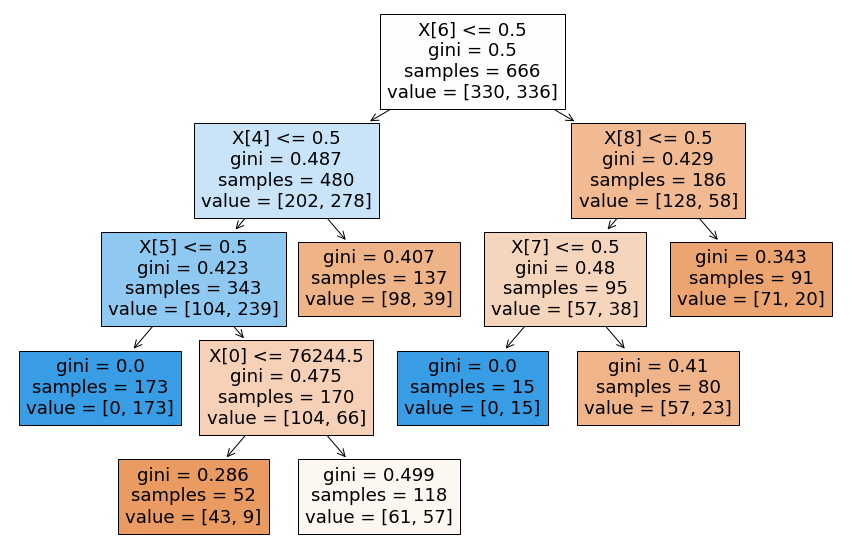

In [49]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_op, filled= True)

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [52]:
bagged_model = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators= 100,
        max_samples= 0.8,
        oob_score= True,
        random_state= 42
)

In [53]:
bagged_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=42)

In [54]:
bagged_model.score(x_test, y_test)

0.8286713286713286

In [55]:
ypred_bag = bagged_model.predict(x_test)

In [56]:
print(classification_report(y_test, ypred_bag))

              precision    recall  f1-score   support

        Good       0.81      0.88      0.84       146
       Risky       0.86      0.78      0.82       140

    accuracy                           0.83       286
   macro avg       0.83      0.83      0.83       286
weighted avg       0.83      0.83      0.83       286



In [57]:
confusion_matrix(y_test, ypred_bag)

array([[128,  18],
       [ 31, 109]], dtype=int64)